<a href="https://colab.research.google.com/github/1oneweeek/Pyt_MCL/blob/main/k-NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('https://drive.google.com/uc?export=download&id=13_rZ_nzqnABax0XFa_TpvDFcnXXLIjwl')
df.head()

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,swimming,hair_washing,dandruff
0,Few,2,Low,0,1,Low,No,Y,None
1,Few,0,Low,0,3,Low,No,N,None
2,Medium,3,Low,1,0,Low,Yes,Y,None
3,Few,2,Low,0,1,Low,No,N,None
4,Few,2,Low,0,1,Low,No,Y,None


In [3]:
print(df["hair_loss"].value_counts())
print(df["pressure_level"].value_counts())
print(df["stress_level"].value_counts())
print(df["swimming"].value_counts())
print(df["hair_washing"].value_counts())
print(df["dandruff"].value_counts())

Few       169
Medium    167
Many       42
A lot      22
Name: hair_loss, dtype: int64
Low          275
Medium        57
High          45
Very High     23
Name: pressure_level, dtype: int64
Low          261
Medium        56
High          45
Very High     38
Name: stress_level, dtype: int64
No     307
Yes     93
Name: swimming, dtype: int64
N    209
Y    191
Name: hair_washing, dtype: int64
None    289
Few      76
Many     35
Name: dandruff, dtype: int64


In [4]:
df.isnull().sum()

hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
stress_level              0
swimming                  0
hair_washing              0
dandruff                  0
dtype: int64

In [5]:
# 데이터 전처리하기
df['dandruff'].replace('None',0,inplace=True)
df['dandruff'].replace('Few',1,inplace=True)
df['dandruff'].replace('Many',2, inplace=True)

df['hair_loss'].replace("Few", 0, inplace=True)
df['hair_loss'].replace("Medium", 1, inplace=True)
df['hair_loss'].replace("Many", 2, inplace=True)
df['hair_loss'].replace("A lot", 3, inplace=True)

df['swimming'].replace('Yes', 1, inplace=True)
df['swimming'].replace('No', 0, inplace=True)

df['hair_washing'].replace('Y', 1, inplace=True)
df['hair_washing'].replace('N', 0, inplace=True)

df.replace('Low', 0, inplace=True)
df.replace('Medium', 1, inplace=True)
df.replace('High', 2, inplace=True)
df.replace('Very High', 3, inplace=True)

df.head()

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,swimming,hair_washing,dandruff
0,0,2,0,0,1,0,0,1,0
1,0,0,0,0,3,0,0,0,0
2,1,3,0,1,0,0,1,1,0
3,0,2,0,0,1,0,0,0,0
4,0,2,0,0,1,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   hair_loss               400 non-null    int64
 1   stay_up_late            400 non-null    int64
 2   pressure_level          400 non-null    int64
 3   coffee_consumed         400 non-null    int64
 4   brain_working_duration  400 non-null    int64
 5   stress_level            400 non-null    int64
 6   swimming                400 non-null    int64
 7   hair_washing            400 non-null    int64
 8   dandruff                400 non-null    int64
dtypes: int64(9)
memory usage: 28.2 KB


In [7]:
X_df= df.drop('hair_loss', axis=1)

In [8]:
X_df.head()

,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,swimming,hair_washing,dandruff
0,2,0,0,1,0,0,1,0
1,0,0,0,3,0,0,0,0
2,3,0,1,0,0,1,1,0
3,2,0,0,1,0,0,0,0
4,2,0,0,1,0,0,1,0


In [9]:
#독립 변수 분리
X_data = X_df.to_numpy()
X_data.shape

(400, 8)

In [10]:
#종속 변수 분리
Y_data = df['hair_loss'].to_numpy()
Y_data.shape

(400,)

In [11]:
#훈련 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.05, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((380, 8), (20, 8), (380,), (20,))

#KNN 모델

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)

In [14]:
#k 값에 따른 정확도 변화 시각화
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn_model.score(X_train, Y_train)

0.9368421052631579

In [16]:
knn_model.score(X_test, Y_test)

0.8

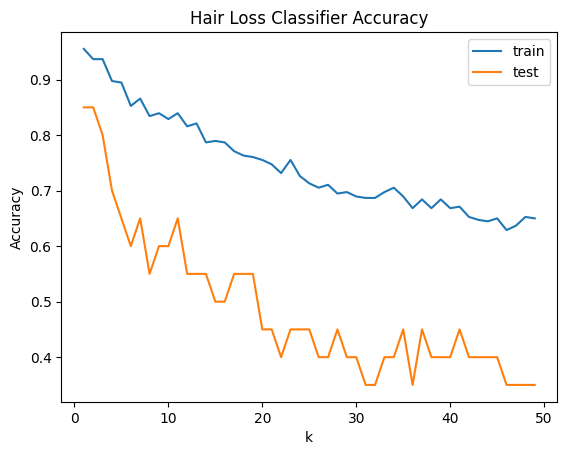

In [17]:
k_list = range(1,50)
acc_train = []
acc_test = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, Y_train )
  acc_train.append(classifier.score(X_train, Y_train))
  acc_test.append(classifier.score(X_test, Y_test))

plt.plot(k_list, acc_train, label = 'train')
plt.plot(k_list, acc_test, label = 'test')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Hair Loss Classifier Accuracy")
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
knn_prediction = knn_model.predict(X_test)
print('  혼동 행렬\n', confusion_matrix(Y_test, knn_prediction))
print('\n평가 지표\n', classification_report(Y_test, knn_prediction, zero_division=0))

  혼동 행렬
 [[ 4  1  0  0]
 [ 2 10  0  0]
 [ 0  0  2  0]
 [ 0  0  1  0]]

평가 지표
               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.91      0.83      0.87        12
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         1

    accuracy                           0.80        20
   macro avg       0.56      0.66      0.60        20
weighted avg       0.78      0.80      0.78        20



정확도가 80%이고 탈모 정도별 정밀도가 전체적으로 낮은 것을 알 수 있다.
즉 탈모 데이터는 k-NN 알고리즘과 잘 맞지 않는 것을 확인할 수 있다.

#딥러닝

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
#원-핫 인코딩
from keras.utils import np_utils
Y_encoded = np_utils.to_categorical(Y_data)
Y= np.asarray(Y_encoded)
Y[0]

array([1., 0., 0., 0.], dtype=float32)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y, test_size=0.05, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape,

((380, 8), (20, 8), (380, 4), (20, 4))

In [22]:
tf.random.set_seed(3)
model = Sequential()
model.add(Dense(72, input_dim=8, activation='relu'))
model.add(Dense(36,activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train,epochs=150, batch_size=10, validation_split=0.10)

Epoch 1/150
35/35 [==============================] - 2s 11ms/step - loss: 1.3340 - accuracy: 0.4094 - val_loss: 1.2231 - val_accuracy: 0.3947
Epoch 2/150
35/35 [==============================] - 0s 4ms/step - loss: 1.1281 - accuracy: 0.4503 - val_loss: 1.1289 - val_accuracy: 0.3684
Epoch 3/150
35/35 [==============================] - 0s 4ms/step - loss: 0.9940 - accuracy: 0.4415 - val_loss: 0.9258 - val_accuracy: 0.4211
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.8707 - accuracy: 0.4649 - val_loss: 0.7666 - val_accuracy: 0.5000
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.7528 - accuracy: 0.7018 - val_loss: 0.7424 - val_accuracy: 0.5263
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.7515 - val_loss: 0.5937 - val_accuracy: 0.8158
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5998 - accuracy: 0.8012 - val_loss: 0.4976 - val_accuracy: 0.8421
Epoch 8/150


In [25]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 29ms/step - loss: 0.2924 - accuracy: 0.9500


[0.29236048460006714, 0.949999988079071]